In [1]:
import env, evaluate, features, split_scale, wrangle

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = acquire.get_zillow_bite()

In [4]:
#Hope this gets rid of that pesky null.
df = df.drop([0, 3980])

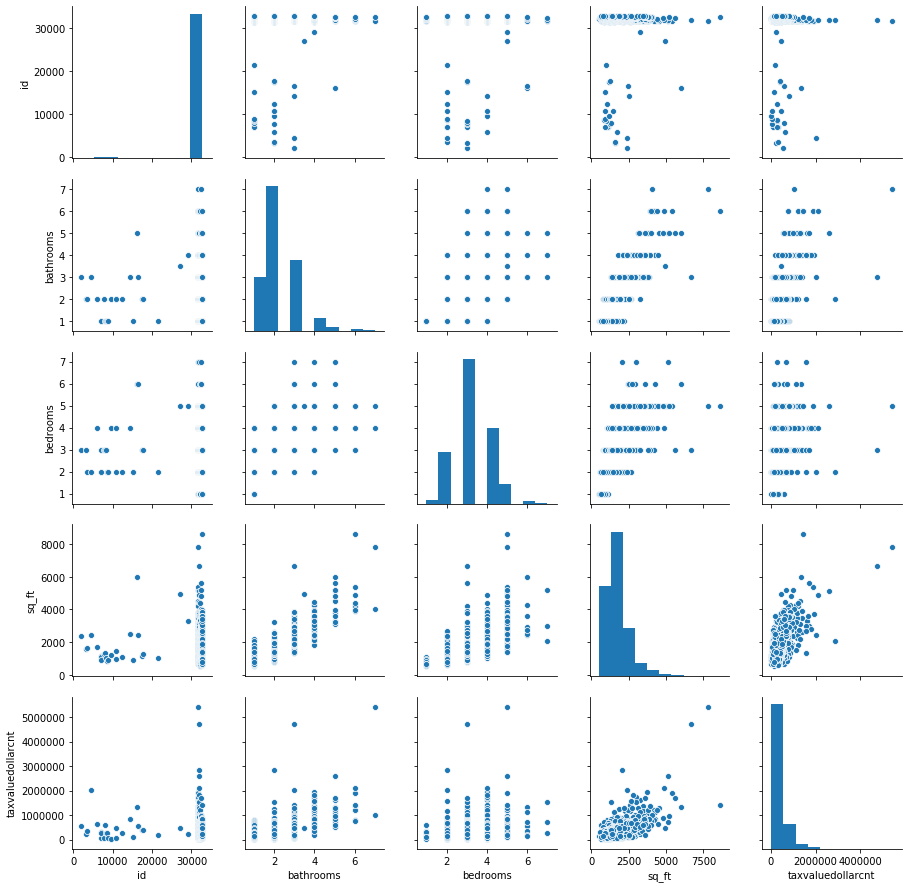

In [5]:
#Lets take a look at what is the correlations between these things.
sns.pairplot(data=df.head(1000))

### Bathrooms count or sq_ft is what I'm betting are the optimum features.

### Split up your data into train/test and each of those into X/y

In [6]:
train, test = split_scale.split_my_data(df)

In [7]:
train.shape

(12826, 5)

In [8]:
test.shape

(3207, 5)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12826 entries, 15300 to 3583
Data columns (total 5 columns):
id                   12826 non-null int64
bathrooms            12826 non-null float64
bedrooms             12826 non-null float64
sq_ft                12826 non-null float64
taxvaluedollarcnt    12826 non-null float64
dtypes: float64(4), int64(1)
memory usage: 601.2 KB


In [10]:
scaler, train_scaled, test_scaled = split_scale.standard_scaler(train, test)

In [11]:
y_train=train[['taxvaluedollarcnt']]
X_train=train_scaled.drop('taxvaluedollarcnt' ,axis=1)

In [12]:
y_test=test[['taxvaluedollarcnt']]
X_test=test_scaled.drop('taxvaluedollarcnt',axis=1)

## Scale X. It looks weird on the plot.

In [ ]:
X_train.head()

In [ ]:
y_train.head()

## We've got X,y for train and test. I'm not gonna scale or engineer the features.

In [ ]:
y_train.sort_values(by='taxvaluedollarcnt', ascending=False).head()

In [13]:
#model 
lm1=LinearRegression()
lm1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
#lm1_predictions is the yhat values for X_train. Lets compare them with the actual y 
#values to find their ERRROR.
y_predictions=lm1.predict(X_train)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#plt.plot(X_train, y_predictions)

# yfit = model.predict(Xfit)
# plt.plot(Xfit, yfit);


In [ ]:
sns.relplot(x="sq_ft", y="taxvaluedollarcnt", size="bedrooms", hue='bathrooms', data=df)

In [15]:
lm1.coef_

array([[   5808.68457105,   82986.66937339, -126432.25787289,
         407670.53604602]])

In [16]:
lm1.intercept_

array([462046.74684235])

In [19]:
y_predictions.shape
type(y_predictions)

numpy.ndarray

In [20]:
evaluate.regression_errors(y_train, y_predictions)

{'sse': taxvaluedollarcnt    2.723481e+15
 dtype: float64, 'mse': taxvaluedollarcnt    2.123406e+11
 dtype: float64, 'rmse': 460804.33929160814, 'ess': 2166590252244215.0, 'tss': taxvaluedollarcnt    4.890071e+15
 dtype: float64}

In [23]:
from math import sqrt

In [45]:
def regression_errors(y, yhat):
    '''
    Returns a dictionary containing various regression error metrics.
    '''
    n = y.size
    residuals = yhat - y
    ybar = np.array(y.mean())

    sse = (residuals**2).sum()

    ess = ((yhat - ybar)**2).sum()

    return {
        'sse': sse,
        'mse': sse / n,
        'rmse': sqrt(sse / n),
        'ess': ess,
        'tss': ess + sse,
    }

In [46]:
regression_errors(y_train, y_predictions)

{'sse': taxvaluedollarcnt    2.723481e+15
 dtype: float64, 'mse': taxvaluedollarcnt    2.123406e+11
 dtype: float64, 'rmse': 460804.33929160814, 'ess': 2166590252244215.0, 'tss': taxvaluedollarcnt    4.890071e+15
 dtype: float64}

In [49]:
n = y_train.size
n

12826

In [50]:
residuals = y_predictions - y_train

residuals.size

12826

In [51]:
y_train.mean()
y_bar = np.array(y_train.mean())

In [53]:
sse = (residuals**2).sum()

sse

taxvaluedollarcnt    2.723481e+15
dtype: float64

In [56]:
mse = sse/n
mse

taxvaluedollarcnt    2.123406e+11
dtype: float64

In [57]:
n = y_train.size
residuals = y_predictions - y_train
ybar = np.array(y_train.mean())
sse = (residuals**2).sum()
ess = ((y_predictions - ybar)**2).sum()

In [58]:
ess

2166590252244215.0

In [60]:
tss = ess + sse

In [61]:
r_squared = ess/tss

taxvaluedollarcnt    0.443059
dtype: float64